# Identifying Rental Opportunities in London using Machine Learning

## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import, clean, and combine rental and crime data files

Note: These files can be extracted from the gov.uk website with a simple search engine enquiry

In [2]:
xls = pd.ExcelFile(r'C:\voa-average-rent-borough.xls')
df = pd.read_excel(xls, '2019')
df.head()

,Area,Count of rents,Average (£),Lower quartile (£),Median (£),Upper quartile (£)
0,City of London,100,2377,1744,2210,2600
1,Barking and Dagenham,810,1192,1000,1200,1350
2,Barnet,2810,1548,1175,1365,1700
3,Bexley,820,1084,875,1100,1275
4,Brent,2010,1578,1250,1500,1800


In [3]:
rent_by_borough = df.drop('Count of rents', 1).set_index('Area')

In [4]:
rent_by_borough.shape

(33, 4)

In [5]:
df1 = pd.read_csv(r'C:\MPS Borough Level Crime (most recent 24 months).csv')
df1.head()

,MajorText,MinorText,LookUp_BoroughName,201904,201905,201906,201907,201908,201909,201910,...,202006,202007,202008,202009,202010,202011,202012,202101,202102,202103
0,Arson and Criminal Damage,Arson,Barking and Dagenham,5,11,3,5,3,6,9,...,4,4,6,2,7,4,2,4,6,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,130,140,113,134,118,109,109,...,121,122,114,116,120,100,109,100,104,80
2,Burglary,Burglary - Business and Community,Barking and Dagenham,27,21,27,31,35,37,30,...,16,28,23,32,21,18,24,20,18,14
3,Burglary,Burglary - Residential,Barking and Dagenham,96,114,96,71,67,80,97,...,63,72,63,54,68,90,91,69,90,71
4,Drug Offences,Drug Trafficking,Barking and Dagenham,5,9,6,11,8,7,9,...,10,21,9,12,13,17,14,12,9,7


In [6]:
df1["Crime Number Summary (24 Months)"] = df1.sum(axis=1)

In [7]:
df1.head(1)

,MajorText,MinorText,LookUp_BoroughName,201904,201905,201906,201907,201908,201909,201910,...,202007,202008,202009,202010,202011,202012,202101,202102,202103,Crime Number Summary (24 Months)
0,Arson and Criminal Damage,Arson,Barking and Dagenham,5,11,3,5,3,6,9,...,4,6,2,7,4,2,4,6,4,118


In [8]:
crime_by_borough = df1.groupby('LookUp_BoroughName')['Crime Number Summary (24 Months)'].sum()
crime_by_borough = pd.DataFrame(crime_by_borough)
crime_by_borough.head()

,Crime Number Summary (24 Months)
LookUp_BoroughName,
Barking and Dagenham,38956
Barnet,57376
Bexley,32669
Brent,57890
Bromley,46050


In [9]:
crime_by_borough.shape

(32, 1)

In [10]:
merged = pd.concat([rent_by_borough, crime_by_borough], axis = 1)
merged.rename(index = {"Sutton": "Sutton, UK", "Bexley" : "Bexley, UK"}, inplace = True)

In [11]:
merged.head()

,Average (£),Lower quartile (£),Median (£),Upper quartile (£),Crime Number Summary (24 Months)
City of London,2377.0,1744.0,2210.0,2600.0,NaN
Barking and Dagenham,1192.0,1000.0,1200.0,1350.0,38956.0
Barnet,1548.0,1175.0,1365.0,1700.0,57376.0
"Bexley, UK",1084.0,875.0,1100.0,1275.0,32669.0
Brent,1578.0,1250.0,1500.0,1800.0,57890.0


## Identify low rent low crime boroughs

In [12]:
merged = merged[merged['Lower quartile (£)'] <= 1200]  
merged.sort_values(by=['Lower quartile (£)'], inplace=True, ascending=True)
merged.head()

,Average (£),Lower quartile (£),Median (£),Upper quartile (£),Crime Number Summary (24 Months)
"Bexley, UK",1084.0,875.0,1100.0,1275.0,32669.0
Croydon,1112.0,900.0,1100.0,1250.0,66595.0
Havering,1131.0,925.0,1100.0,1300.0,35058.0
"Sutton, UK",1130.0,925.0,1100.0,1250.0,26281.0
Hillingdon,1268.0,1000.0,1200.0,1450.0,51064.0


In [13]:
merged = merged[merged['Crime Number Summary (24 Months)'] <= 35000]  
merged.sort_values(by=['Crime Number Summary (24 Months)'], inplace=True, ascending=True)
merged = merged.reset_index()

Text(0.5, 0, 'Borough')

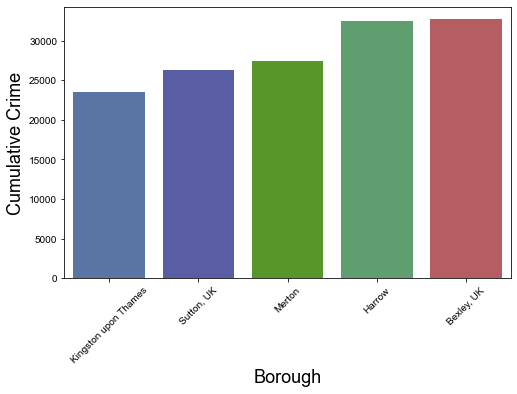

In [14]:
width = 8
height = 5
plt.figure(figsize=(width, height))
palette = sns.color_palette(["#4c72b0","#4c52b0","#55a818","#55a868","#c44e52"])
sns.barplot(x="index", y='Crime Number Summary (24 Months)', palette=palette, data=merged)
sns.set_style("whitegrid")
plt.xticks(rotation=45)
#plt.title(('Crime Level versus Borough over a 24 Month period'), fontsize = 18) 
plt.ylabel(('Cumulative Crime'), fontsize = 18) 
plt.xlabel(('Borough'), fontsize = 18)

In [15]:
low_crime_low_rent = merged.head()
top_rental_locations = merged.sort_values(by=['Average (£)'])
top_rental_locations

,index,Average (£),Lower quartile (£),Median (£),Upper quartile (£),Crime Number Summary (24 Months)
4,"Bexley, UK",1084.0,875.0,1100.0,1275.0,32669.0
1,"Sutton, UK",1130.0,925.0,1100.0,1250.0,26281.0
0,Kingston upon Thames,1396.0,1075.0,1300.0,1595.0,23575.0
3,Harrow,1396.0,1150.0,1350.0,1600.0,32435.0
2,Merton,1542.0,1200.0,1400.0,1750.0,27441.0


Text(0.5, 0, 'Borough')

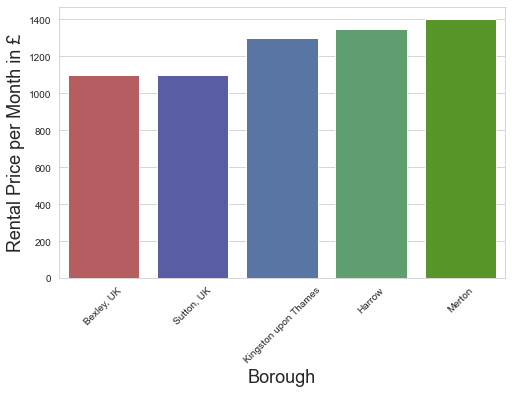

In [16]:
width = 8
height = 5
plt.figure(figsize=(width, height))
palette = sns.color_palette(["#c44e52", "#4c52b0", "#4c72b0", "#55a868", "#55a818"])
sns.barplot(x="index", y='Median (£)', palette=palette, data=top_rental_locations)
sns.set_style("whitegrid")
plt.xticks(rotation=45)
#plt.title(('Rental Price versus Borough'), fontsize = 18) 
plt.ylabel(('Rental Price per Month in £'), fontsize = 18) 
plt.xlabel(('Borough'), fontsize = 18)

Two key observations can be drawn from the previous analysis: 1) The borough's of Kingston upon Thames and Sutton have the lowest crime; 2) Bexley and Sutton have the lowest rent. 
However, before any conclusions are made about the best rental location it is important to understand how far away the boroughs are from London city centre.

## Find the geo coordinates 

In [17]:
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
top_rental_locations['Location'] = top_rental_locations['index'].apply(geocode)

In [18]:
top_rental_locations['Point'] = top_rental_locations['Location'].apply(lambda loc: tuple(loc.point) if loc else None)
top_rental_locations[['Latitude', 'Longitude', 'Altitude']] = pd.DataFrame(top_rental_locations['Point'].tolist(), index=top_rental_locations.index)

In [19]:
top_rental_locations

,index,Average (£),Lower quartile (£),Median (£),Upper quartile (£),Crime Number Summary (24 Months),Location,Point,Latitude,Longitude,Altitude
4,"Bexley, UK",1084.0,875.0,1100.0,1275.0,32669.0,"(Bexley, London Borough of Bexley, London, Gre...","(51.4416793, 0.150488, 0.0)",51.441679,0.150488,0.0
1,"Sutton, UK",1130.0,925.0,1100.0,1250.0,26281.0,"(London Borough of Sutton, London, Greater Lon...","(51.357464449999995, -0.17362689496950337, 0.0)",51.357464,-0.173627,0.0
0,Kingston upon Thames,1396.0,1075.0,1300.0,1595.0,23575.0,"(Kingston upon Thames, London, Greater London,...","(51.4096275, -0.3062621, 0.0)",51.409627,-0.306262,0.0
3,Harrow,1396.0,1150.0,1350.0,1600.0,32435.0,"(London Borough of Harrow, London, Greater Lon...","(51.596827149999996, -0.3373046180437286, 0.0)",51.596827,-0.337305,0.0
2,Merton,1542.0,1200.0,1400.0,1750.0,27441.0,"(London Borough of Merton, London, Greater Lon...","(51.41086985, -0.18809708858824303, 0.0)",51.410870,-0.188097,0.0


In [20]:
top_rental_locations = top_rental_locations.drop(['Location', 'Point', 'Altitude'], axis=1)
top_rental_locations

,index,Average (£),Lower quartile (£),Median (£),Upper quartile (£),Crime Number Summary (24 Months),Latitude,Longitude
4,"Bexley, UK",1084.0,875.0,1100.0,1275.0,32669.0,51.441679,0.150488
1,"Sutton, UK",1130.0,925.0,1100.0,1250.0,26281.0,51.357464,-0.173627
0,Kingston upon Thames,1396.0,1075.0,1300.0,1595.0,23575.0,51.409627,-0.306262
3,Harrow,1396.0,1150.0,1350.0,1600.0,32435.0,51.596827,-0.337305
2,Merton,1542.0,1200.0,1400.0,1750.0,27441.0,51.410870,-0.188097


#### Find Geo Coordiantes for London

In [21]:
from geopy.geocoders import Nominatim

address = 'London, UK'

geolocator = Nominatim(user_agent="myGeocoder")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


#### Add low rent low crime boroughs onto map

In [22]:
import folium
map1 = folium.Map(
    location=[51.5073219, -0.1276474],
    #tiles='cartodbpositron',
    zoom_start=10,
)
top_rental_locations.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]]).add_to(map1), axis=1)
map1

It is interesting to observe that the top three boroughs with low crime and low rents are all located in south west london. Either one of these locations could 
be a good potential starting point for a rental search. It is important to filter these locations based on access to the city centre and local amenities. 

## Distance from London city centre

In [23]:
from math import *
def lat_lng(lat1,lng1,lat2,lng2):

    R = 6373.0 #earth radius in km
    dlng = radians(lng2) - radians(lng1)
    dlat = radians(lat2) - radians(lat1)
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlng / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [24]:
Bexley_distance = lat_lng(51.441679, 0.150488, 51.5073219, -0.1276474)
print('Bexley is {:.2f} km from London city centre.'.format(Bexley_distance))

Sutton_distance = lat_lng(51.357464, -0.173627, 51.5073219, -0.1276474)
print('Sutton is {:.2f} km from London city centre.'.format(Sutton_distance))

Kingston_distance = lat_lng(51.409627, -0.306262, 51.5073219, -0.1276474)
print('Kingston upon Thames is {:.2f} km from London city centre.'.format(Kingston_distance))

Harrow_distance = lat_lng(51.596827, -0.337305, 51.5073219, -0.1276474)
print('Harrow is {:.2f} km from London city centre.'.format(Harrow_distance))

Merton_distance = lat_lng(51.410870, -0.188097, 51.5073219, -0.1276474)
print('Merton is {:.2f} km from London city centre.'.format(Merton_distance))

Bexley is 13.12 km from London city centre.
Sutton is 16.79 km from London city centre.
Kingston upon Thames is 13.07 km from London city centre.
Harrow is 11.87 km from London city centre.
Merton is 11.01 km from London city centre.


In [25]:
frame = [Kingston_distance, Sutton_distance, Merton_distance, Harrow_distance, Bexley_distance]
distance = pd.DataFrame(frame, columns=['City Distance'])

In [26]:
merged_2 = pd.concat([top_rental_locations, distance], axis = 1)
merged_2

,index,Average (£),Lower quartile (£),Median (£),Upper quartile (£),Crime Number Summary (24 Months),Latitude,Longitude,City Distance
0,Kingston upon Thames,1396.0,1075.0,1300.0,1595.0,23575.0,51.409627,-0.306262,13.070990
1,"Sutton, UK",1130.0,925.0,1100.0,1250.0,26281.0,51.357464,-0.173627,16.785042
2,Merton,1542.0,1200.0,1400.0,1750.0,27441.0,51.410870,-0.188097,11.005658
3,Harrow,1396.0,1150.0,1350.0,1600.0,32435.0,51.596827,-0.337305,11.865184
4,"Bexley, UK",1084.0,875.0,1100.0,1275.0,32669.0,51.441679,0.150488,13.121648


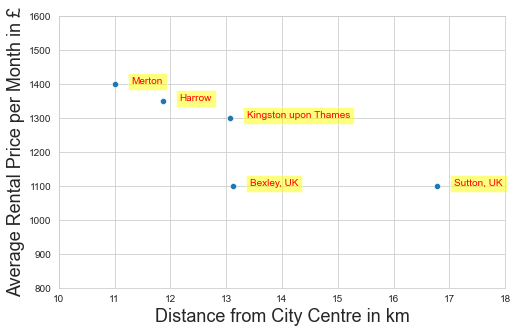

In [27]:
width = 8
height = 5
plt.figure(figsize=(width, height))
sns.scatterplot(x="City Distance", y='Median (£)', data=merged_2)
sns.set_style("whitegrid")
#plt.title(('Rental Price per Month vs Distance from City Centre'), fontsize = 18)  
plt.ylabel(('Average Rental Price per Month in £'), fontsize = 18)  
plt.xlabel(('Distance from City Centre in km'), fontsize = 18)  
plt.ylim(800,1600)
plt.xlim(10,18)

for i in range(merged_2.shape[0]):
 plt.text(x=merged_2['City Distance'][i]+0.3,y=merged_2['Median (£)'][i]+0.3,s=merged_2['index'][i], 
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Bexley has relatively low crime compared to other London Boroughs, the lowest rental rates, and appears to be below the trend of rental price versus distance in the figure above. Therefore, Bexley will be taken forward for further analysis. The purpose of the next section is to identify local areas within Bexley that might be suitable for renting.

## Import, explore, and analyse Bexley Rental Data

The bexley rental data used in the following work was extracted from Rightmove using a custom designed web crawler (crawler not included in this work). There were 163 rental properties available at the time of crawling.

In [28]:
xls2 = pd.ExcelFile(r'C:\Bexley_Rent.xlsx')
df2 = pd.read_excel(xls2)

In [29]:
bexley_rent = df2[['Property ID', 'amount', 'latitude', 'longitude']].copy()
bexley_rent

,Property ID,amount,latitude,longitude
0,80188200,1550,51.422550,0.107950
1,104886908,1595,51.430410,0.085720
2,90663691,1595,51.470890,0.164610
3,79249044,1600,51.471140,0.179245
4,80149251,1600,51.476215,0.127397
...,...,...,...,...
158,105839249,650,51.442016,0.117957
159,105264521,680,51.495030,0.133190
160,105839285,700,51.440151,0.117308
161,78594582,700,51.453150,0.175860


In [30]:
bexley_rent.describe()

,Property ID,amount,latitude,longitude
count,1.630000e+02,163.000000,163.000000,163.000000
mean,9.095264e+07,1191.202454,51.462551,0.135834
std,1.437386e+07,490.505612,0.023865,0.029920
min,1.317684e+07,400.000000,51.414153,0.084249
25%,7.990137e+07,922.500000,51.446075,0.108646
50%,9.081828e+07,1175.000000,51.462223,0.133190
75%,1.056463e+08,1395.000000,51.483472,0.156334
max,1.067322e+08,3593.000000,51.512200,0.197172


Map the location of the rental properties onto Bexley.

In [31]:
from geopy.geocoders import Nominatim

address = 'Bexley, UK'

geolocator = Nominatim(user_agent="myGeocoder")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.4416793, 0.150488.


In [32]:
import folium
map1 = folium.Map(
    location=[51.4416793, 0.150488],
    #tiles='cartodbpositron',
    zoom_start=12,
)
bexley_rent.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

Lets identify price clusters within bexley.

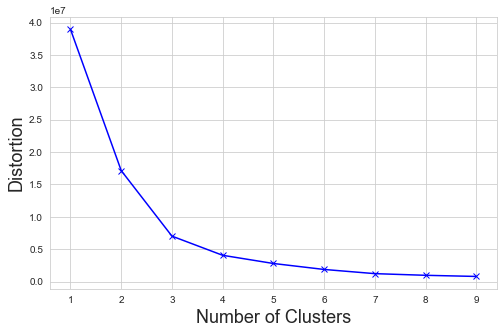

In [33]:
# import k-means from clustering stage

bexley_clustering = bexley_rent.drop('Property ID', 1)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(bexley_clustering)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel(('Number of Clusters'), fontsize = 18) 
plt.ylabel(('Distortion'), fontsize = 18) 
#plt.title('The Elbow Method Showing the Optimal k')
plt.show()

There are three clear price clusters

In [34]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bexley_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

bexley_clustering.insert(0, 'Cluster Labels', kmeans.labels_)

In [35]:
bexley_clustering

,Cluster Labels,amount,latitude,longitude
0,0,1550,51.422550,0.107950
1,0,1595,51.430410,0.085720
2,0,1595,51.470890,0.164610
3,0,1600,51.471140,0.179245
4,0,1600,51.476215,0.127397
...,...,...,...,...
158,1,650,51.442016,0.117957
159,1,680,51.495030,0.133190
160,1,700,51.440151,0.117308
161,1,700,51.453150,0.175860


Map the clusters in Bexley

In [36]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], tiles='cartodbpositron', zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bexley_clustering['latitude'], bexley_clustering['longitude'], bexley_clustering['amount'], bexley_clustering['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 0 (Red) - Moderately Priced

In [37]:
Cluster_0 = bexley_clustering.loc[bexley_clustering['Cluster Labels'] == 0, bexley_clustering.columns[[1] + list(range(5, bexley_clustering.shape[1]))]]
Cluster_0.describe()

,amount
count,99.000000
mean,1296.696970
std,187.108691
min,1050.000000
25%,1170.000000
50%,1200.000000
75%,1400.000000
max,1900.000000


#### Cluster 1 (Purple) - Cheap

In [38]:
Cluster_1 = bexley_clustering.loc[bexley_clustering['Cluster Labels'] == 1, bexley_clustering.columns[[1] + list(range(5, bexley_clustering.shape[1]))]]
Cluster_1.describe()

,amount
count,55.000000
mean,754.981818
std,183.797946
min,400.000000
25%,600.000000
50%,775.000000
75%,922.500000
max,1000.000000


#### Cluster 2 (Green) - Expensive

In [39]:
Cluster_2 = bexley_clustering.loc[bexley_clustering['Cluster Labels'] == 2, bexley_clustering.columns[[1] + list(range(5, bexley_clustering.shape[1]))]]
Cluster_2.describe()

,amount
count,9.000000
mean,2696.555556
std,468.897406
min,2100.000000
25%,2400.000000
50%,2500.000000
75%,2850.000000
max,3593.000000


Lets re-examine the cheap cluster since most of the properties are <1200. 

#### Create a new dataframe with cluster 1

In [40]:
df_cls_1 = bexley_clustering.loc[bexley_clustering['Cluster Labels'] == 1]

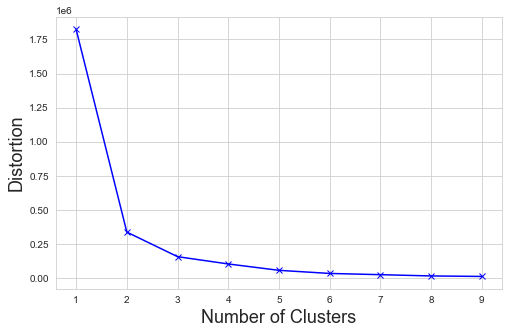

In [41]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_cls_1)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel(('Number of Clusters'), fontsize = 18) 
plt.ylabel(('Distortion'), fontsize = 18) 
#plt.title('The Elbow Method Showing the Optimal k')
plt.show()

There is two sub-clusters within the cheap cluster

In [42]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cls_1)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
df_cls_1 = df_cls_1.drop('Cluster Labels', 1)

In [43]:
df_cls_1.insert(0, 'Cluster Labels', kmeans.labels_)

In [44]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_cls_1['latitude'], df_cls_1['longitude'], df_cls_1['amount'], df_cls_1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 0 (Red) - Really Cheap

In [45]:
Cluster_0 = df_cls_1.loc[df_cls_1['Cluster Labels'] == 0, df_cls_1.columns[[1] + list(range(5, df_cls_1.shape[1]))]]
Cluster_0.describe()

,amount
count,26.000000
mean,581.346154
std,85.317732
min,400.000000
25%,522.500000
50%,587.500000
75%,637.500000
max,700.000000


#### Cluster 1 (Purple) - Moderately Cheap

In [46]:
Cluster_1 = df_cls_1.loc[df_cls_1['Cluster Labels'] == 1, df_cls_1.columns[[1] + list(range(5, df_cls_1.shape[1]))]]
Cluster_1.describe()

,amount
count,29.000000
mean,910.655172
std,74.536317
min,775.000000
25%,850.000000
50%,920.000000
75%,975.000000
max,1000.000000


In [47]:
low_priced_rentals_blexley = df_cls_1.loc[df_cls_1['Cluster Labels'] == 0]
low_priced_rentals_blexley.shape

(26, 4)

Lets investigate the really cheap cluster further. We can use Foursquare to find local venues in close proximity of each property. 

## Foursquare

In [67]:
CLIENT_ID = '=' # your Foursquare ID
CLIENT_SECRET = '=' # your Foursquare Secret
VERSION = '=' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: =
CLIENT_SECRET:=


Lets create a function to find all venues in a 200m distance from each rental property in our list. Properties with no close venues will be removed from the dataset.

In [49]:
def getNearbyVenues(latitudes, longitudes, radius=200):
    
    venues_list=[]
    for lat, lng in zip(latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
             
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [ 
                  'House Latitude', 
                  'House Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
import requests 

bexley_venues = getNearbyVenues(
                                   latitudes=low_priced_rentals_blexley['latitude'],
                                   longitudes=low_priced_rentals_blexley['longitude']
                                  )

In [51]:
print(bexley_venues.shape)
bexley_venues.head()

(66, 6)


,House Latitude,House Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,51.45315,0.17586,Crayford Arms,51.452768,0.177045,Pub
1,51.45315,0.17586,The Duke Of Wellington,51.452114,0.174158,Pub
2,51.45315,0.17586,Maxin,51.452175,0.177623,Burger Joint
3,51.45315,0.17586,The One Bell,51.453556,0.175224,Pub
4,51.45315,0.17586,British Raj,51.453699,0.177704,Indian Restaurant


In [52]:
print('There are {} venues that are 200m or less from the houses in the really cheap rent cateogory.'.format(len(bexley_venues['Venue Category'])))

There are 66 venues that are 200m or less from the houses in the really cheap rent cateogory.


In [53]:
print('There are {} unique venue categories.'.format(len(bexley_venues['Venue Category'].unique())))

There are 27 unique venue categories.


We can group the venues with their respective latitude and longitude to identify houses with lots of local amenities.

In [54]:
bexley_venues.groupby(['House Latitude', 'House Longitude']).count()

,,Venue,Venue Latitude,Venue Longitude,Venue Category
House Latitude,House Longitude,,,,
51.425526,0.098318,4,4,4,4
51.440151,0.117308,2,2,2,2
51.442016,0.117957,2,2,2,2
51.448090,0.180691,3,3,3,3
51.449349,0.084249,2,2,2,2
51.450047,0.183201,8,8,8,8
51.453150,0.175860,15,15,15,15
51.456290,0.087340,2,2,2,2
51.462880,0.105920,9,9,9,9


There is a house (51.453150, 0.175860) with 15 venues in a 200 m proximity. This has good potential for a rental accomodation.

## Lets onehot the categories and group venues with their respective houses

In [55]:
# one hot encoding
bexley_onehot = pd.get_dummies(bexley_venues[['Venue Category']], prefix="", prefix_sep="")

# add house latitude and longitude back to dataframe
bexley_onehot['House Latitude'] = bexley_venues['House Latitude']
bexley_onehot['House Longitude'] = bexley_venues['House Longitude']

# group venues into their houses
bexley_grouped = bexley_onehot.groupby(['House Latitude', 'House Longitude']).mean().reset_index()

bexley_grouped

,House Latitude,House Longitude,Arts & Crafts Store,Breakfast Spot,Burger Joint,Café,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,...,Pizza Place,Platform,Pub,Restaurant,Shopping Plaza,Sporting Goods Shop,Supermarket,Toy / Game Store,Trail,Train Station
0,51.425526,0.098318,0.000,0.0,0.0,0.250000,0.000,0.000000,0.0,0.000000,...,0.250000,0.000000,0.250000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000
1,51.440151,0.117308,0.000,0.0,0.0,0.000000,0.000,0.000000,0.5,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000
2,51.442016,0.117957,0.000,0.0,0.0,0.000000,0.000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000
3,51.448090,0.180691,0.000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,...,0.000000,0.333333,0.000000,0.000000,0.000,0.000,0.333333,0.000,0.0,0.333333
4,51.449349,0.084249,0.000,0.5,0.0,0.000000,0.000,0.000000,0.0,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000
5,51.450047,0.183201,0.125,0.0,0.0,0.000000,0.125,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.125,0.125,0.000000,0.125,0.0,0.000000
6,51.453150,0.175860,0.000,0.0,0.2,0.000000,0.000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.600000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000
7,51.456290,0.087340,0.000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000
8,51.462880,0.105920,0.000,0.0,0.0,0.111111,0.000,0.111111,0.0,0.000000,...,0.111111,0.000000,0.111111,0.111111,0.000,0.000,0.111111,0.000,0.0,0.000000
9,51.463459,0.100390,0.000,0.0,0.0,0.000000,0.000,0.250000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.250000


Theres only fourteen potentially viable rental properties left in our analysis. Lets find out what kind of venues are in close proximity to each property.

#### Create a new dataframe to display the top 10 venues for each rental property.

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['House Latitude']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
house_venues_sorted = pd.DataFrame(columns=columns)
house_venues_sorted['House Latitude'] =  bexley_grouped['House Latitude']

for ind in np.arange(bexley_grouped.shape[0]):
    house_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bexley_grouped.iloc[ind, :], num_top_venues)
    
house_venues_sorted['House Longitude'] = bexley_grouped['House Longitude']
first_column = house_venues_sorted.pop('House Longitude')
house_venues_sorted.insert(1, 'House Longitude', first_column)

house_venues_sorted.head(14)

,House Latitude,House Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,51.425526,0.098318,Café,Pub,Pizza Place,Indian Restaurant,House Longitude,Furniture / Home Store,Arts & Crafts Store,Breakfast Spot,Burger Joint,Clothing Store
1,51.440151,0.117308,Construction & Landscaping,Golf Course,House Longitude,Trail,Arts & Crafts Store,Breakfast Spot,Burger Joint,Café,Clothing Store,Coffee Shop
2,51.442016,0.117957,Construction & Landscaping,House Longitude,Trail,Arts & Crafts Store,Breakfast Spot,Burger Joint,Café,Clothing Store,Coffee Shop,Convenience Store
3,51.448090,0.180691,Train Station,Supermarket,Platform,House Longitude,Sporting Goods Shop,Shopping Plaza,Arts & Crafts Store,Breakfast Spot,Burger Joint,Café
4,51.449349,0.084249,Breakfast Spot,Pizza Place,House Longitude,Golf Course,Arts & Crafts Store,Burger Joint,Café,Clothing Store,Coffee Shop,Construction & Landscaping
5,51.450047,0.183201,House Longitude,Toy / Game Store,Arts & Crafts Store,Sporting Goods Shop,Shopping Plaza,Clothing Store,Pharmacy,Pet Store,Electronics Store,Fast Food Restaurant
6,51.453150,0.175860,Pub,Burger Joint,Indian Restaurant,House Longitude,Golf Course,Arts & Crafts Store,Breakfast Spot,Café,Clothing Store,Coffee Shop
7,51.456290,0.087340,Furniture / Home Store,House Longitude,Trail,Arts & Crafts Store,Breakfast Spot,Burger Joint,Café,Clothing Store,Coffee Shop,Construction & Landscaping
8,51.462880,0.105920,Grocery Store,Pizza Place,Café,Supermarket,Coffee Shop,Fast Food Restaurant,Restaurant,Pub,Pharmacy,House Longitude
9,51.463459,0.100390,Train Station,Italian Restaurant,Coffee Shop,Grocery Store,House Longitude,Shopping Plaza,Arts & Crafts Store,Breakfast Spot,Burger Joint,Café


## Final K Means Clustering to identify properties with similar types/quantity of amenities

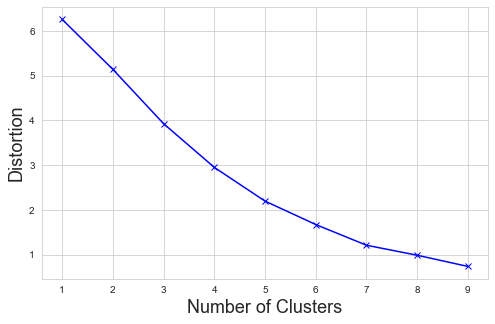

In [58]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(bexley_grouped)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel(('Number of Clusters'), fontsize = 18) 
plt.ylabel(('Distortion'), fontsize = 18) 
#plt.title('The Elbow Method Showing the Optimal k')
plt.show()

In [59]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bexley_grouped)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
bexley_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [60]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(bexley_grouped['House Latitude'], bexley_grouped['House Longitude'], bexley_grouped['Cluster Labels']):
    label = folium.Popup(' Latitude ' + str(lat) + ' Longitude ' + str(lon) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 0 (Red - Pubs)

In [61]:
bexley_grouped.loc[bexley_grouped['Cluster Labels'] == 0, bexley_grouped.columns[[1] + list(range(5, bexley_grouped.shape[1]))]]

,House Latitude,Burger Joint,Café,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Electronics Store,Fast Food Restaurant,Furniture / Home Store,...,Pizza Place,Platform,Pub,Restaurant,Shopping Plaza,Sporting Goods Shop,Supermarket,Toy / Game Store,Trail,Train Station
6,51.45315,0.2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,51.46573,0.0,0.000000,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0,...,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,51.47281,0.0,0.166667,0.0,0.0,0.0,0.000000,0.166667,0.0,0.0,...,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cluster 1 (Purple - High Street)

In [62]:
bexley_grouped.loc[bexley_grouped['Cluster Labels'] == 1, bexley_grouped.columns[[1] + list(range(5, bexley_grouped.shape[1]))]]

,House Latitude,Burger Joint,Café,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Electronics Store,Fast Food Restaurant,Furniture / Home Store,...,Pizza Place,Platform,Pub,Restaurant,Shopping Plaza,Sporting Goods Shop,Supermarket,Toy / Game Store,Trail,Train Station
0,51.425526,0.0,0.250000,0.000,0.000000,0.0,0.0,0.000,0.000000,0.0,...,0.250000,0.000000,0.250000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000
3,51.448090,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000,0.000000,0.0,...,0.000000,0.333333,0.000000,0.000000,0.000,0.000,0.333333,0.000,0.0,0.333333
4,51.449349,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000,0.000000,0.0,...,0.500000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.000000
5,51.450047,0.0,0.000000,0.125,0.000000,0.0,0.0,0.125,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.125,0.125,0.000000,0.125,0.0,0.000000
8,51.462880,0.0,0.111111,0.000,0.111111,0.0,0.0,0.000,0.111111,0.0,...,0.111111,0.000000,0.111111,0.111111,0.000,0.000,0.111111,0.000,0.0,0.000000
9,51.463459,0.0,0.000000,0.000,0.250000,0.0,0.0,0.000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.250000


#### Cluster 2 (Blue - Trail)

In [63]:
bexley_grouped.loc[bexley_grouped['Cluster Labels'] == 2, bexley_grouped.columns[[1] + list(range(5, bexley_grouped.shape[1]))]]

,House Latitude,Burger Joint,Café,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Electronics Store,Fast Food Restaurant,Furniture / Home Store,...,Pizza Place,Platform,Pub,Restaurant,Shopping Plaza,Sporting Goods Shop,Supermarket,Toy / Game Store,Trail,Train Station
12,51.49464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Cluster 3 (Aquamarine - Construction)

In [64]:
bexley_grouped.loc[bexley_grouped['Cluster Labels'] == 3, bexley_grouped.columns[[1] + list(range(5, bexley_grouped.shape[1]))]]

,House Latitude,Burger Joint,Café,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Electronics Store,Fast Food Restaurant,Furniture / Home Store,...,Pizza Place,Platform,Pub,Restaurant,Shopping Plaza,Sporting Goods Shop,Supermarket,Toy / Game Store,Trail,Train Station
1,51.440151,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51.442016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cluster 4 (Light Green - Golf)

In [65]:
bexley_grouped.loc[bexley_grouped['Cluster Labels'] == 4, bexley_grouped.columns[[1] + list(range(5, bexley_grouped.shape[1]))]]

,House Latitude,Burger Joint,Café,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Electronics Store,Fast Food Restaurant,Furniture / Home Store,...,Pizza Place,Platform,Pub,Restaurant,Shopping Plaza,Sporting Goods Shop,Supermarket,Toy / Game Store,Trail,Train Station
13,51.51075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cluster 5 (Orange - Furniture)

In [66]:
bexley_grouped.loc[bexley_grouped['Cluster Labels'] == 5, bexley_grouped.columns[[1] + list(range(5, bexley_grouped.shape[1]))]]

,House Latitude,Burger Joint,Café,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Electronics Store,Fast Food Restaurant,Furniture / Home Store,...,Pizza Place,Platform,Pub,Restaurant,Shopping Plaza,Sporting Goods Shop,Supermarket,Toy / Game Store,Trail,Train Station
7,51.45629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Conclusions

Based on this analysis, any house in cluster 0 or 1 will be of low rent, low crime, and near local amenities. The choice now depends on the personal preference. Purple appears to be locations with lots of nearby venues that are alongside main roads, which would imply they are high street locations, whereas red seems to be a pub cluster. If i was looking for a place to rent in London i would go red.